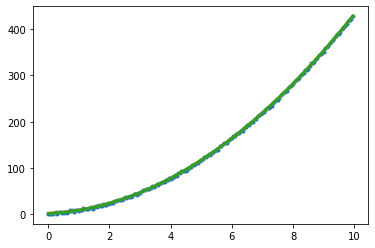

In [35]:
'''
Linear Regression
Implement a simple Linear Regression with Numpy to fit a line h(x)=w1+w2*x
Teng Li
2020.06.28
'''

from matplotlib import pyplot as plt
import torch


def generate_data(f,spread, x_start, x_end, delta=1):
    '''
    generate a number of data points from f with some spread
    '''
    x = torch.arange(x_start,x_end,delta)
    y = f(x) + (torch.rand(*x.shape) - 0.5) * spread
    return x,y

def linear_regression(X,Y):
    '''
    W = ((XT*X)^-1)*XT*Y
    input: (x,y) is the set of data points  
    return: W that h(x)=w0 + w1*x + w2*x^2
    '''
    X = torch.unsqueeze(X,axis=1)
    ones = torch.full_like(X,1)
    X_squear = pow(X,2)
    X = torch.cat((ones,X,X_squear),1)
    W = torch.inverse(torch.transpose(X,0,1)@X)@X.T@Y
    return W

#define the function and generate some points
f = lambda x: 2+3*x+4*pow(x,2)
X,Y = generate_data(f,5,0,10,0.05)
#linear regression
W = linear_regression(X,Y)
#plot the points and f
plt.figure()
plt.plot(X,Y,'.')
plt.plot(X,f(X),linewidth=3)
plt.plot(x,W[0]+W[1]*X+W[2]*pow(X,2),linewidth=3)
plt.show()